In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [59]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [63]:
df[['sex','bmi']].describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


<Axes: >

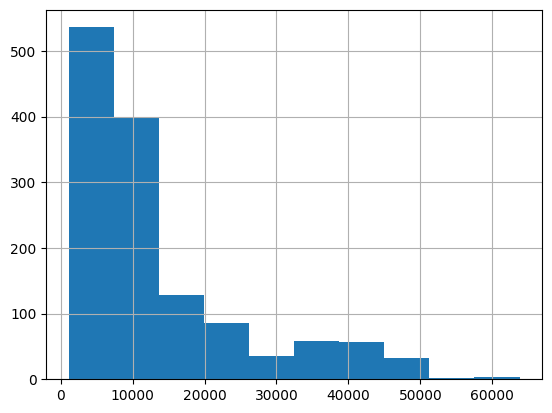

In [64]:
df.charges.hist()

<Axes: >

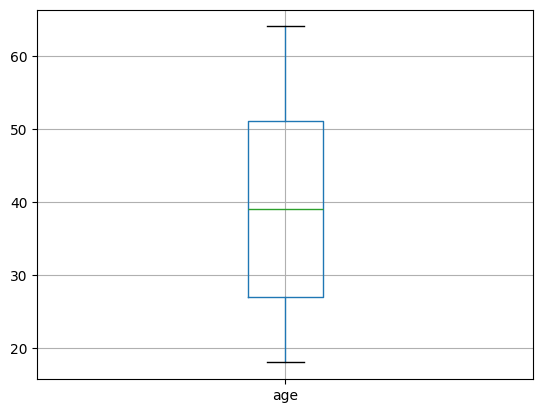

In [65]:
df.boxplot('age')

<Axes: xlabel='region'>

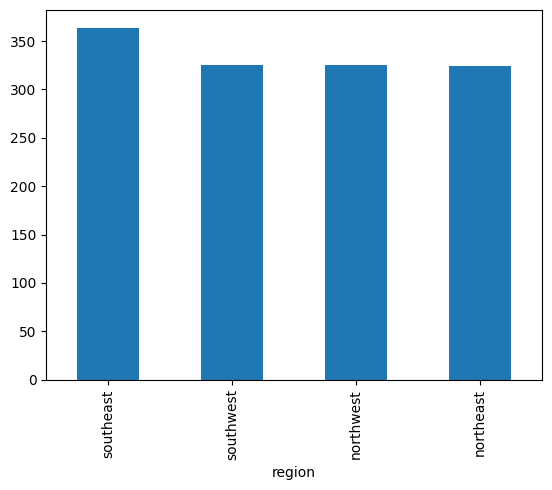

In [66]:
df['region'].value_counts().plot.bar()

In [67]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
df.age.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool

In [69]:
df.select_dtypes(include=np.number).cov()


,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [70]:
corr = df.select_dtypes(include=np.number).corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


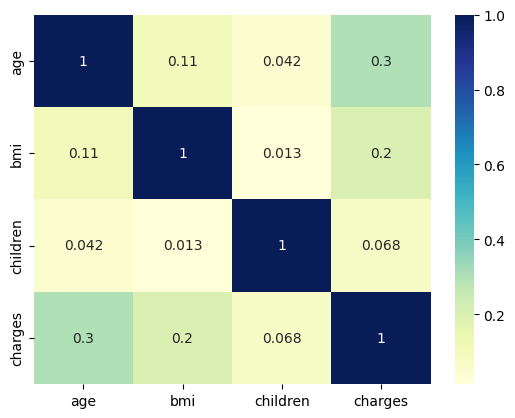

In [71]:
import seaborn as sb
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",


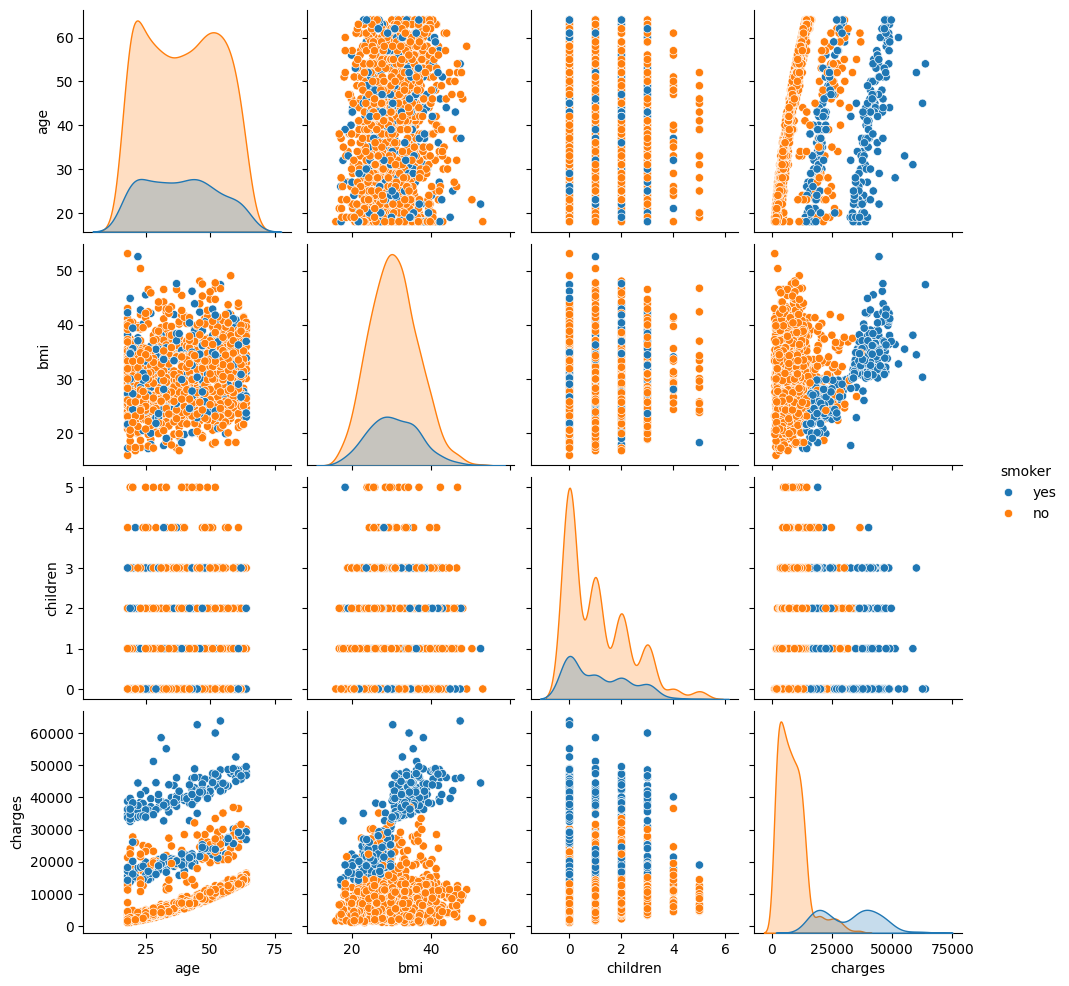

In [72]:
# pairplot with hue sex
sb.pairplot(df, hue="smoker")
# to show
plt.show()

<Axes: xlabel='smoker'>

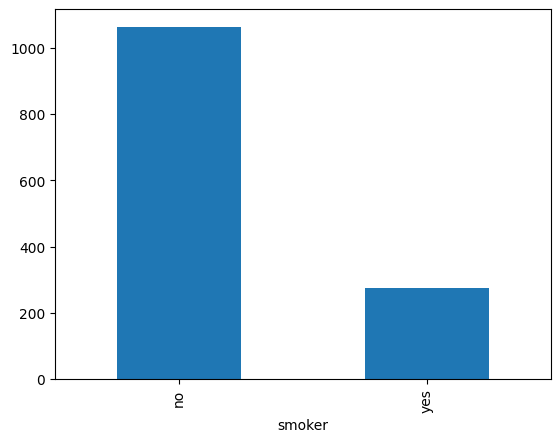

In [73]:
df['smoker'].value_counts().plot.bar()

In [74]:
nonsmoker_ch = df[df['smoker'] == 'no'].charges.mean()
smoker_ch = df[df['smoker'] == 'yes'].charges.mean()

<BarContainer object of 2 artists>

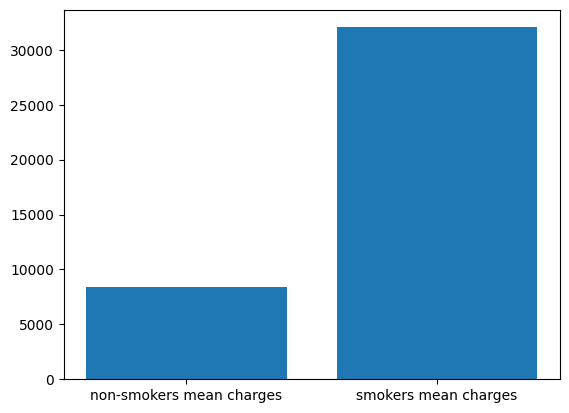

In [75]:
plt.bar(['non-smokers mean charges', 'smokers mean charges'], [nonsmoker_ch, smoker_ch])

In [76]:
mean_ch = []
for re in df.region.unique():
    mean_ch.append(df[df['region'] == re].charges.mean())

<BarContainer object of 4 artists>

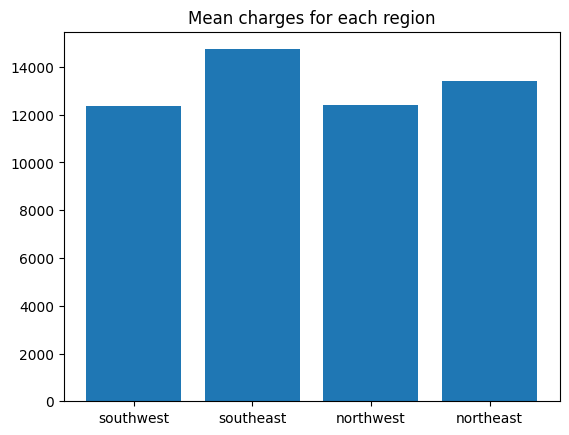

In [77]:
plt.title("Mean charges for each region")
plt.bar(df.region.unique(), mean_ch)

<Axes: xlabel='region'>

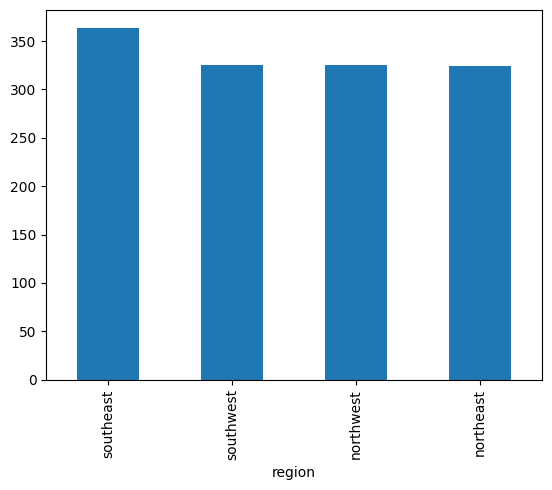

In [78]:
df['region'].value_counts().plot.bar()

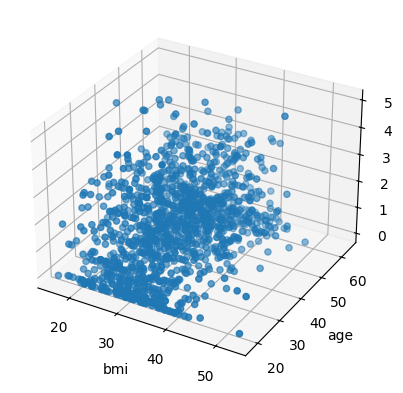

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['bmi'], df['age'], df['children'])
ax.set_xlabel('bmi')
ax.set_ylabel('age')
ax.set_zlabel('children')
plt.show()